In [1]:
%load_ext autoreload
%autoreload 2

In [230]:
from sklearn.pipeline import Pipeline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from python_files.fetch_missing_data import fetch_missing_data
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyRegressor
from python_files.data import GetData
from python_files.basic_preprocessing import BasicPreprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import seaborn as sns
import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, max_error
import math
from sklearn import datasets, ensemble
from sklearn.model_selection import learning_curve
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

In [3]:
data = GetData().get_data()['AllDataMerged_updated']
df = data.copy()
df.shape

(8939, 35)

In [21]:
# Replace NaN by 0
df.runtime.replace(np.NaN, 0, inplace=True)

In [22]:
df.isnull().sum()

id                                0
budget                            0
genres                          246
imdb_id                         227
original_language                 1
production_companies              0
production_countries              0
release_date                     21
revenue                           0
runtime                           0
spoken_languages                 83
status                            0
title                             0
production_companies_number       0
production_countries_number       0
spoken_languages_number           0
belongs_to_collection          7467
actor1_name                       0
actor1_gender                     0
actor2_name                       0
actor2_gender                     0
actor3_name                       0
actor3_gender                     0
actor4_name                       0
actor4_gender                     0
actor5_name                       0
actor5_gender                     0
actor_number                

In [23]:
df.dtypes

id                               int64
budget                           int64
genres                          object
imdb_id                         object
original_language               object
production_companies            object
production_countries            object
release_date                    object
revenue                          int64
runtime                        float64
spoken_languages                object
status                          object
title                           object
production_companies_number      int64
production_countries_number      int64
spoken_languages_number          int64
belongs_to_collection           object
actor1_name                     object
actor1_gender                    int64
actor2_name                     object
actor2_gender                  float64
actor3_name                     object
actor3_gender                    int64
actor4_name                     object
actor4_gender                    int64
actor5_name              

In [24]:
# Apply log feature to budget and revnue
df['budget_log'] = np.log(df['budget'])
df['revenue_log'] = np.log(df['revenue'])

In [25]:
# Define X and Y
X = df[['budget_log','runtime','production_companies_number','production_countries_number',
       'spoken_languages_number','director_number','producer_number','actor_number']]
y = df['revenue_log']

In [26]:
# Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

## Scaling

In [27]:
# Parallelize "num_transformer" 
preprocessor = ColumnTransformer([
('Standardization_scaling', StandardScaler(), ['budget_log', 'runtime']),
('MinMax_scaling', MinMaxScaler(), ['production_companies_number', 'production_countries_number',
                                    'director_number','producer_number','actor_number','spoken_languages_number'])],
remainder ='passthrough' )

preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('Standardization_scaling', StandardScaler(),
                                 ['budget_log', 'runtime']),
                                ('MinMax_scaling', MinMaxScaler(),
                                 ['production_companies_number',
                                  'production_countries_number',
                                  'director_number', 'producer_number',
                                  'actor_number', 'spoken_languages_number'])])

In [41]:
# Transform X train
X_train_transformed = preprocessor.fit_transform(X_train)

pd.DataFrame(
X_train_transformed,
columns=preprocessor.get_feature_names_out()
).head().transpose()

,0,1,2,3,4
Standardization_scaling__budget_log,0.125261,-0.642494,1.208570,-1.243594,0.592337
Standardization_scaling__runtime,0.095036,-0.090480,-0.306914,-0.554268,0.806178
MinMax_scaling__production_companies_number,0.041667,0.250000,0.250000,0.041667,0.083333
MinMax_scaling__production_countries_number,0.111111,0.111111,0.222222,0.111111,0.111111
MinMax_scaling__director_number,0.047619,0.047619,0.047619,0.047619,0.047619
MinMax_scaling__producer_number,0.045455,0.136364,0.136364,0.000000,0.136364
MinMax_scaling__actor_number,0.066964,0.156250,0.084821,0.058036,0.165179
MinMax_scaling__spoken_languages_number,0.111111,0.111111,0.111111,0.111111,0.111111


In [29]:
X_train_transformed.shape

(6257, 8)

In [40]:
# Transform X test (Do not fit on test data)
X_test_transformed = preprocessor.transform(X_test)

pd.DataFrame(
X_test_transformed,
columns=preprocessor.get_feature_names_out()
).head().transpose()

,0,1,2,3,4
Standardization_scaling__budget_log,0.279278,0.167543,1.265621,-3.641074,0.167543
Standardization_scaling__runtime,-0.832541,-0.863460,0.125955,-0.306914,0.960774
MinMax_scaling__production_companies_number,0.166667,0.000000,0.041667,0.041667,0.166667
MinMax_scaling__production_countries_number,0.111111,0.111111,0.111111,0.111111,0.111111
MinMax_scaling__director_number,0.047619,0.000000,0.047619,0.047619,0.047619
MinMax_scaling__producer_number,0.136364,0.000000,0.090909,0.000000,0.136364
MinMax_scaling__actor_number,0.071429,0.000000,0.071429,0.040179,0.183036
MinMax_scaling__spoken_languages_number,0.111111,0.111111,0.111111,0.666667,0.111111


## Linear model

In [31]:
# Instantiate and train the model

lin_model = LinearRegression()
lin_model.fit(X_train_transformed,y_train)

LinearRegression()

In [34]:
# Score the model

lin_model.score(X_test_transformed,y_test)

0.4851364906703195

In [39]:
# Evaluate model metrics

lin_model.coef_.mean(), lin_model.intercept_.mean()

(0.585726482631132, 16.535815971448883)

In [102]:
y_lin_pred = lin_model.predict(X_test_transformed)
y_lin_pred

array([17.09020337, 16.66193143, 18.4516959 , ..., 16.57481443,
       16.4710656 , 16.30941103])

In [103]:
# Regression metrics

mse = mean_squared_error(y_test, y_lin_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test, y_lin_pred)
rsquared = r2_score(y_test, y_lin_pred)
max_error = max_error(y_test, y_lin_pred)

print('MSE =', round(mse, 2))
print('RMSE =', round(rmse, 2))
print('MAE =', round(mae, 2))
print('R2 =', round(rsquared, 2))
print('Max Error =', round(max_error, 2))

MSE = 2.4
RMSE = 1.55
MAE = 1.13
R2 = 0.49
Max Error = 7.79


## SGD model

In [43]:
# Instantiate and train the model

sgd_model = SGDRegressor()
sgd_model.fit(X_train_transformed,y_train)

SGDRegressor()

In [44]:
# Score the model

sgd_model.score(X_test_transformed,y_test)

0.4850010995906011

In [49]:
# Evaluate model metrics

sgd_model.coef_.mean(),sgd_model.intercept_.mean()

(0.7032532773272371, 16.362324550412957)

In [108]:
y_sgd_pred = sgd_model.predict(X_test_transformed)
y_sgd_pred

array([17.09455851, 16.67788061, 18.41095739, ..., 16.77656937,
       16.47717333, 16.27366194])

In [111]:
# Regression metrics

mse = mean_squared_error(y_test, y_sgd_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test, y_sgd_pred)
rsquared = r2_score(y_test, y_sgd_pred)
max_error = max_error(y_test, y_sgd_pred)

print('MSE =', round(mse, 2))
print('RMSE =', round(rmse, 2))
print('MAE =', round(mae, 2))
print('R2 =', round(rsquared, 2))
print('Max Error =', round(max_error, 2))

MSE = 2.4
RMSE = 1.55
MAE = 1.12
R2 = 0.49
Max Error = 7.83


## KNeighborsRegressor

In [72]:
# Instantiate and train the model

knn_score = []

for i in range (1,500):
    knn_model = KNeighborsRegressor(n_neighbors=i)
    knn_model.fit(X_train_transformed,y_train)
    # Score the model
    knn_score = np.append(knn_score,knn_model.score(X_test_transformed,y_test))

In [73]:
knn_score

array([0.00627377, 0.25486542, 0.33300431, 0.37520815, 0.39702563,
       0.41197967, 0.42401632, 0.42859705, 0.43455505, 0.43563341,
       0.4392674 , 0.44148314, 0.44518524, 0.44927878, 0.45117562,
       0.45400002, 0.45719728, 0.45759174, 0.4597335 , 0.46101776,
       0.4617291 , 0.4641933 , 0.46557221, 0.46618898, 0.46595901,
       0.46654422, 0.46701362, 0.4670514 , 0.46812344, 0.46951127,
       0.46875916, 0.46782315, 0.46969721, 0.47004757, 0.47046291,
       0.47130843, 0.47152278, 0.47127974, 0.47292701, 0.47380988,
       0.4742752 , 0.47453875, 0.47351804, 0.47404034, 0.4746772 ,
       0.47429728, 0.47384035, 0.47416083, 0.47427355, 0.47441469,
       0.47447115, 0.47466646, 0.47522499, 0.47554868, 0.47555915,
       0.47555966, 0.47602499, 0.4753931 , 0.47462498, 0.47465336,
       0.4746569 , 0.4746867 , 0.47457804, 0.47472054, 0.47455818,
       0.47406146, 0.47398954, 0.4736456 , 0.47393413, 0.47397607,
       0.47461189, 0.47398712, 0.47381167, 0.47412622, 0.47378

In [82]:
k_neighbours

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

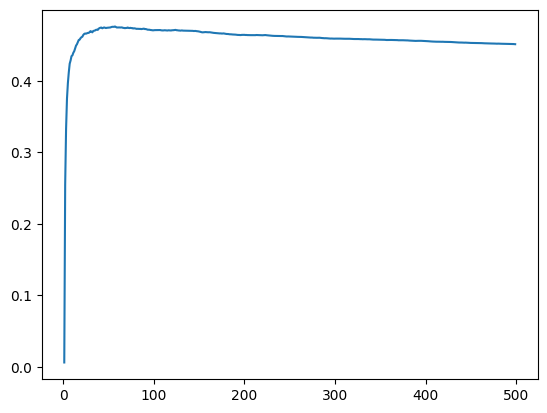

In [86]:
# Display knn_score against kneighbour
k_neighbours = list(range(1, 500))
                    
plt.plot(k_neighbours,knn_score)

In [91]:
np.argmax(knn_score),knn_score.max()

(56, 0.47602499349729965)

In [112]:
# Instantiate and train the model

knn_model = KNeighborsRegressor(n_neighbors=56)
knn_model.fit(X_train_transformed,y_train)

y_knn_pred = knn_model.predict(X_test_transformed)
y_knn_pred

array([17.10347269, 16.58216383, 18.80819837, ..., 16.46303036,
       16.59075693, 16.26468994])

In [113]:
y_knn_pred = knn_model.predict(X_test_transformed)
y_knn_pred

array([17.10347269, 16.58216383, 18.80819837, ..., 16.46303036,
       16.59075693, 16.26468994])

In [116]:
# Regression metrics

mse = mean_squared_error(y_test, y_knn_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test, y_knn_pred)
rsquared = r2_score(y_test, y_knn_pred)
max_error = max_error(y_test, y_knn_pred)

print('MSE =', round(mse, 2))
print('RMSE =', round(rmse, 2))
print('MAE =', round(mae, 2))
print('R2 =', round(rsquared, 2))
print('Max Error =', round(max_error, 2))

MSE = 2.44
RMSE = 1.56
MAE = 1.14
R2 = 0.48
Max Error = 7.66


## GradientBoostingRegressor

In [95]:
# Define parameters

params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [99]:
# Instanciate and fit model

reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train_transformed,y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=4, min_samples_split=5,
                          n_estimators=500)

In [117]:
y_reg_pred = reg.predict(X_test_transformed)
y_reg_pred

array([17.18067789, 16.66476142, 18.85209213, ..., 15.96765746,
       15.98598549, 15.84822947])

In [120]:
# Regression metrics

mse = mean_squared_error(y_test, y_reg_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test, y_reg_pred)
rsquared = r2_score(y_test, y_reg_pred)
max_error = max_error(y_test, y_reg_pred)

print('MSE =', round(mse, 2))
print('RMSE =', round(rmse, 2))
print('MAE =', round(mae, 2))
print('R2 =', round(rsquared, 2))
print('Max Error =', round(max_error, 2))

MSE = 2.36
RMSE = 1.54
MAE = 1.12
R2 = 0.49
Max Error = 7.38


### Learning curves

In [121]:
X_test_transformed.shape

(2682, 8)

In [123]:
X_train_transformed.shape

(6257, 8)

In [138]:
# Set training size
train_sizes = [250,500,750,1000,1250,1500,1750,2000,2250,2500]
# Get train scores(R2), train sizes and validation scores using 'Learning curve'
train_sizes, train_scores, test_scores = learning_curve(
estimator=ensemble.GradientBoostingRegressor(**params), X=X_train_transformed, y=y_train, train_sizes=train_sizes, cv=5)
# Take the mean of corss-validated train scores and test scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

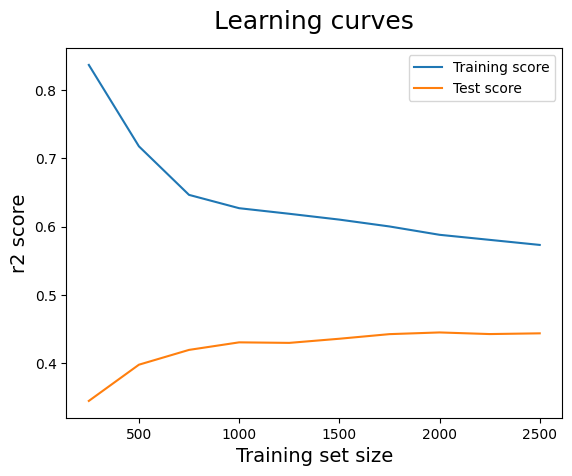

In [139]:
# Plot scores
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()

## XGBoost

In [184]:
# Instanciate and fit model
xgb_r = xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 15, seed = 50)

In [185]:
# Fit the model
xgb_r.fit(X_train_transformed,y_train)

[15:04:04] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=15, n_jobs=0,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=50, reg_alpha=0, ...)

In [186]:
# Predict the model
y_xgb_pred = xgb_r.predict(X_test_transformed)
y_xgb_pred

array([17.15133 , 16.615234, 19.004795, ..., 15.772025, 16.03345 ,
       15.786903], dtype=float32)

In [189]:
# Regression metrics

mse = mean_squared_error(y_test, y_xgb_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test, y_xgb_pred)
rsquared = r2_score(y_test, y_xgb_pred)
max_error = max_error(y_test, y_xgb_pred)

print('MSE =', round(mse, 2))
print('RMSE =', round(rmse, 2))
print('MAE =', round(mae, 2))
print('R2 =', round(rsquared, 2))
print('Max Error =', round(max_error, 2))

MSE = 2.41
RMSE = 1.55
MAE = 1.14
R2 = 0.48
Max Error = 7.57


In [190]:
# Set training size
train_sizes = [250,500,750,1000,1250,1500,1750,2000,2250,2500]
# Get train scores(R2), train sizes and validation scores using 'Learning curve'
train_sizes, train_scores, test_scores = learning_curve(
estimator=xg.XGBRegressor(objective ='reg:linear',
                  n_estimators = 15, seed = 50), X=X_train_transformed, y=y_train, train_sizes=train_sizes, cv=5)
# Take the mean of corss-validated train scores and test scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

[15:04:24] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[15:04:24] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[15:04:24] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[15:04:24] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[15:04:24] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[15:04:24] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[15:04:24] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[15:04:24] WARNING: ../src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.
[15:04:24] WARNING: ../src/objective/regression_

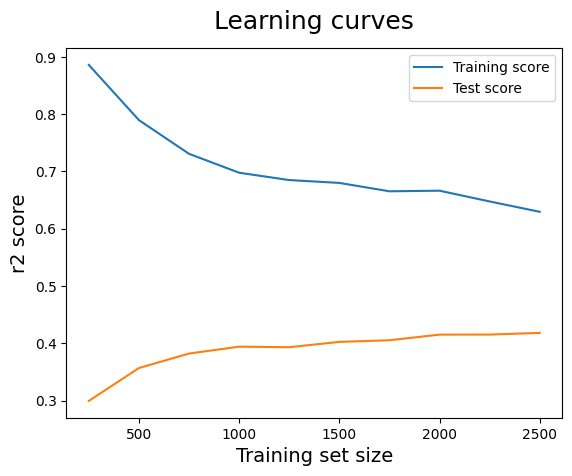

In [192]:
# Plot scores
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()

### RandomForestRegressor

In [227]:
# Instanciate and fit model
rfr = RandomForestRegressor(n_estimators=100,max_depth=1)
rfr.fit(X_train_transformed,y_train)

RandomForestRegressor(max_depth=1)

In [228]:
# Predict the model
y_rfr_pred = rfr.predict(X_test_transformed)
y_rfr_pred

array([17.83425765, 17.69420897, 17.83425765, ..., 17.69420897,
       15.48579774, 15.48579774])

In [231]:
# Regression metrics

mse = mean_squared_error(y_test, y_rfr_pred)
rmse = math.sqrt(mse)
mae = mean_absolute_error(y_test, y_rfr_pred)
rsquared = r2_score(y_test, y_rfr_pred)
max_error = max_error(y_test, y_rfr_pred)

print('MSE =', round(mse, 2))
print('RMSE =', round(rmse, 2))
print('MAE =', round(mae, 2))
print('R2 =', round(rsquared, 2))
print('Max Error =', round(max_error, 2))

MSE = 3.19
RMSE = 1.79
MAE = 1.36
R2 = 0.31
Max Error = 8.47


In [234]:
# Set training size
train_sizes = [250,500,750,1000,1250,1500,1750,2000,2250,2500]
# Get train scores(R2), train sizes and validation scores using 'Learning curve'
train_sizes, train_scores, test_scores = learning_curve(
estimator=RandomForestRegressor(n_estimators=100,max_depth=1), X=X_train_transformed, y=y_train, train_sizes=train_sizes, cv=5)
# Take the mean of corss-validated train scores and test scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

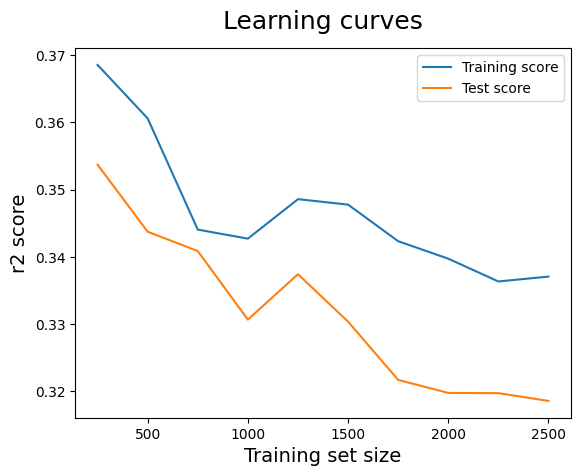

In [235]:
# Plot scores
plt.plot(train_sizes, train_scores_mean, label = 'Training score')
plt.plot(train_sizes, test_scores_mean, label = 'Test score')
plt.ylabel('r2 score', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves', fontsize = 18, y = 1.03)
plt.legend()

## Data preprocessing

In [240]:
data_test = pd.read_csv('../data/test.csv')
data_test.head(3).transpose()

,0,1,2
id,3001,3002,3003
belongs_to_collection,"[{'id': 34055, 'name': 'Pokémon Collection', '...",NaN,NaN
budget,0,88000,0
genres,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...","[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...","[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '..."
homepage,http://www.pokemon.com/us/movies/movie-pokemon...,NaN,NaN
imdb_id,tt1226251,tt0051380,tt0118556
original_language,ja,en,en
original_title,ディアルガVSパルキアVSダークライ,Attack of the 50 Foot Woman,Addicted to Love
overview,Ash and friends (this time accompanied by newc...,When an abused wife grows to giant size becaus...,Good-natured astronomer Sam is devastated when...
popularity,3.851534,3.559789,8.085194


In [242]:
df_test = data_test.copy()
df_test.head(2)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."


In [243]:
def get_dictionary(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d

In [262]:
df_test = df_test
df_test['genres'] = df_test['genres'].map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))
genres = df_test.genres.str.get_dummies(sep=',')
df_test = pd.concat([df_test, genres], axis=1, sort=False)

In [263]:
df_test.shape

(4398, 22)

In [264]:
df_test[['genres']]

,genres
0,
1,
2,
3,
4,
...,...
4393,
4394,
4395,
4396,


In [266]:
df_test.Drama

AttributeError: 'DataFrame' object has no attribute 'Drama'

In [265]:
print("Drama Genres Movie           ", df_test[df_test.Drama == 1].shape[0])

AttributeError: 'DataFrame' object has no attribute 'Drama'